## 1. Answer the questions
   1. Derive an analytical solution to the regression problem. Use a vector form of the equation.

1) $$L(\theta) = ||y - Xw||^2 = \sum (y_i - x_i^T w)^2$$

2) $$L(\theta) = (y - Xw)^T (y - Xw) = y^T y - 2 y^T X w + w^T X^T X w$$

3) $$\frac{\partial L}{\partial w} = -2 X^T (y - Xw) = 0$$

$$X^T X w = X^T y$$

\(y - y = 0\) - приравнять к нулю

$$0 = X^T y - X^T X w$$

\(X^T X\) - матричная грамма, и при условии \(\det(X^T X) \neq 0\) существует обратная матрица \((X^T X)^{-1}\)

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{bmatrix}
$$

$$
X^T X = \begin{bmatrix}
X_0^T X_0 & X_0^T X_1 \\
X_1^T X_0 & X_1^T X_1
\end{bmatrix}
$$

$$
X^T y = \begin{bmatrix}
X_0^T y \\
X_1^T y
\end{bmatrix}
$$

Распределение строк:

$$
\begin{cases}
X_0^T X_0 w_0 + X_0^T X_1 w_1 = X_0^T y \\
X_1^T X_0 w_0 + X_1^T X_1 w_1 = X_1^T y
\end{cases}
$$


5) Используем метод обратной матрицы:

$$
w = (X^T X)^{-1} X^T y
$$


   2. What changes in the solution when L1 and L2 regularizations are added to the loss function.
   3. Explain why L1 regularization is often used to select features. Why are there many weights equal to 0 after the model is fit?
   4. Explain how you can use the same models (Linear regression, Ridge, etc.) but make it possible to fit nonlinear dependencies.

2.

При добавлении к функции потерь регуляризационных членов L1 и L2, в задачу оптимизации вводится штраф за величину весов модели. Это помогает избежать переобучения за счет ограничения "сложности" модели:

- Функция потерь с L1-регуляризацией имеет вид:

$$
E = \frac{1}{n} \sum (y_i - \hat{y}_i)^2 + \lambda \sum |w_j|
$$

где $\sum |w_j|$ — сумма абсолютных значений весов, штрафующая большие веса.

- Функция потерь с L2-регуляризацией:

$$
E = \frac{1}{n} \sum (y_i - \hat{y}_i)^2 + \lambda \sum w_j^2
$$

где $\sum w_j^2$ — сумма квадратов весов, которая тоже ограничивает их величины.

Штрафы заставляют модель стремиться к меньшим весам, что предотвращает переобучение и делает модель устойчивее.



3.

L1 регуляризация стимулирует разреженность модели, то есть приводит к тому, что многие коэффициенты весов становятся ровно нулём. Это происходит из-за того, что добавление суммы абсолютных значений весов в функцию потерь создает эффект "сжатия" весов к нулю, но некоторые веса полностью обнуляются.

В итоге признаки с весами равными нулю считаются неважными и фактически исключаются из модели. Именно поэтому L1-регуляризация используется для автоматического отбора признаков — она оставляет только наиболее значимые.

4. 

Для обучения нелинейных зависимостей с помощью линейных моделей (линейная регрессия, Ridge и др.) используют преобразование признаков:

- Добавляют новые признаки, например, полиномиальные: $x, x^2, x^3 $ и др.
- Можно также использовать различные функции от исходных признаков, например, логарифмы, синусы и т.п.

## 2 Introduction — make all the preprocessing staff from the previous lesson

* Import libraries.
* Read Train and Test Parts.
* Preprocess "Interest Level" feature.

In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_json("data/train.json")

percentile_1 = df["price"].quantile(0.01)
percentile_9 = df["price"].quantile(0.99)
train_df = df[(df["price"] > percentile_1) & (df["price"] < percentile_9)].copy()

In [3]:
pd.set_option("future.no_silent_downcasting", True)
train_df.loc[:,"interest_level"] = train_df["interest_level"].replace({"low": 0,"medium": 1, "high": 2}).copy()

## 3. Intro data analysis part 2
   1. Let's generate additional features for better model quality. Consider a column called "Features". It consists of a list of highlights of the current flat.
   2. Remove unused symbols ([,], ', ", and space) from the column.
   3. Get all values in each list and collect the result in one huge list for the whole dataset. You can use DataFrame.iterrows().
   4. How many unique values does a result list contain?
   5. Let's get acquainted with the new library — Collections. With this package you could effectively get quantity statistics about your data.
   6. Count the most popular functions from our huge list and take the top 20 for this moment.
   7. If everything is correct, you should get next values:  'Elevator', 'CatsAllowed', 'HardwoodFloors', 'DogsAllowed', 'Doorman', 'Dishwasher', 'NoFee', 'LaundryinBuilding', 'FitnessCenter', 'Pre-War', 'LaundryinUnit', 'RoofDeck', 'OutdoorSpace', 'DiningRoom', 'HighSpeedInternet', 'Balcony', 'SwimmingPool', 'LaundryInBuilding', 'NewConstruction', 'Terrace'.
   8. Now create 20 new features based on the top 20 values: 1 if the value is in the "Feature" column, otherwise 0.
   9. Extend our feature set with 'bathrooms', 'bedrooms' and create a special variable feature_list with all feature names. Now we have 22 values. All models should be trained on these 22 features.

In [4]:
train_df["features"] = train_df["features"].astype(str)
train_df["features"] = train_df["features"].str.replace(r'[$$$$\'"\s]',"", regex=True)

In [5]:
list_features_train = []
for index, row in train_df.iterrows():
  for feature in row["features"].split(","):
    list_features_train.append(feature)
list_features_train

['[DiningRoom',
 'Pre-War',
 'LaundryinBuilding',
 'Dishwasher',
 'HardwoodFloors',
 'DogsAllowed',
 'CatsAllowed]',
 '[Doorman',
 'Elevator',
 'LaundryinBuilding',
 'Dishwasher',
 'HardwoodFloors',
 'NoFee]',
 '[Doorman',
 'Elevator',
 'LaundryinBuilding',
 'LaundryinUnit',
 'Dishwasher',
 'HardwoodFloors]',
 '[]',
 '[Doorman',
 'Elevator',
 'FitnessCenter',
 'LaundryinBuilding]',
 '[Doorman',
 'Elevator',
 'Loft',
 'Dishwasher',
 'HardwoodFloors',
 'NoFee]',
 '[Fireplace',
 'LaundryinUnit',
 'Dishwasher',
 'HardwoodFloors',
 'NoFee]',
 '[Elevator',
 'LaundryinBuilding',
 'Dishwasher',
 'HardwoodFloors',
 'NoFee]',
 '[HardwoodFloors]',
 '[CatsAllowed',
 'DogsAllowed]',
 '[Doorman',
 'Elevator',
 'LaundryinBuilding',
 'DogsAllowed',
 'CatsAllowed]',
 '[RoofDeck',
 'Doorman',
 'Elevator',
 'FitnessCenter',
 'Pre-War',
 'LaundryinBuilding',
 'HighSpeedInternet',
 'Dishwasher',
 'HardwoodFloors',
 'NoFee',
 'DogsAllowed',
 'CatsAllowed]',
 '[SwimmingPool',
 'RoofDeck',
 'Doorman',
 'Eleva

In [6]:
counter = Counter(list_features_train)
top_21 = counter.most_common(21)
top_21

[('Elevator', 19824),
 ('Dishwasher', 18215),
 ('DogsAllowed', 18146),
 ('HardwoodFloors', 16263),
 ('CatsAllowed]', 14430),
 ('LaundryinBuilding', 14284),
 ('FitnessCenter', 12209),
 ('Doorman', 10781),
 ('NoFee', 10073),
 ('[Doorman', 9407),
 ('LaundryinUnit', 7488),
 ('NoFee]', 6705),
 ('CatsAllowed', 5504),
 ('HardwoodFloors]', 5179),
 ('Pre-War', 4835),
 ('[RoofDeck', 4583),
 ('[Elevator', 4363),
 ('HighSpeedInternet', 4176),
 ('[]', 3106),
 ('[CatsAllowed', 2927),
 ('DogsAllowed]', 2910)]

In [7]:
top_21 = [x for x in top_21 if x[0] != ""]

for feature_name in top_21:
    train_df[feature_name[0]] = train_df["features"].apply(lambda x: 1 if feature_name[0] in x.split(",") else 0)

feature_list = [x[0] for x in top_21] + ["bathrooms", "bedrooms"]

In [8]:
train_df["bathrooms"] = train_df["bathrooms"].astype(int)

X = train_df[feature_list].copy()
y = train_df["price"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)


4. Models implementation — Linear regression
   1. Initialize the random number generator with a seed of 21.
   2. Implement a Python class for a linear regression algorithm with two basic methods — fit and predict. Use stochastic gradient descent (SGD) to find optimal model weights. For better understanding, we recommend implementing separate versions of the algorithm with the analytical solution and non-stochastic gradient descent under the hood.
   3. What is determenistic model? Make SGD determenistic.
   4. Define the R squared (R2) coefficient and implement a function to calculate it.
   5. Make predictions with your algorithm and estimate the model with MAE, RMSE and R2 metrics.
   6. Initialize LinearRegression() from sklearn.linear_model, fit the model, and predict the training and test parts as in the previous lesson.
   7. Compare the quality metrics and make sure the difference is small (between your implementations and sklearn).
   8. Store the metrics as in the previous lesson in a table with columns model, train, test for MAE table, RMSE table, and R2 coefficient.

In [9]:
class linear_regression():
  def __init__(self):
    self.lr_speed = 0.00001
    self.lr_epochs = 400
    self.weights = None

  def fit(self, X, y):
    X = np.array(X)
    y = np.array(y)

    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features + 1)
    np.random.seed(21)

    for _ in range(self.lr_epochs):
      indices = np.random.permutation(n_samples)

      xi = X[indices]
      yi = y[indices]
      y_pred = np.dot(xi, self.weights[1:]) + self.weights[0]

      error = yi - y_pred

      self.weights[1:] += self.lr_speed * np.dot(error, xi)
      self.weights[0] += self.lr_speed * error.sum()

  def predict(self, X):
    X = np.array(X)
    return np.dot(X, self.weights[1:]) + self.weights[0]

  def r_squared (self, y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    u = ((y - y_pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - (u / v)

In [10]:
lr_my = linear_regression()
lr_my.fit(X_train, y_train)

y_pred_my_train = lr_my.predict(X_train)
y_pred_my_test = lr_my.predict(X_test)

mae_my_train = mean_absolute_error(y_train, y_pred_my_train)
mae_my_test = mean_absolute_error(y_test, y_pred_my_test)

rmse_my_train = np.sqrt(mean_squared_error(y_train, y_pred_my_train))
rmse_my_test = np.sqrt(mean_squared_error(y_test, y_pred_my_test))

r2_my_train = lr_my.r_squared(y_train, y_pred_my_train)
r2_my_test = lr_my.r_squared(y_test, y_pred_my_test)

In [11]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred_linear_train = model_linear.predict(X_train)
y_pred_linear_test = model_linear.predict(X_test)

mae_linear_train = mean_absolute_error(y_train, y_pred_linear_train)
mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)
rmse_linear_train = np.sqrt(mean_squared_error(y_train, y_pred_linear_train))
rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))
r2_linear_train = model_linear.score(X_train, y_train)
r2_linear_test = model_linear.score(X_test, y_test)

In [12]:
columns = ["model", "train", "test"]

mae_table = pd.DataFrame([
    {"model": "lr_my", "train": mae_my_train, "test": mae_my_test},
    {"model": "LinearRegression", "train": mae_linear_train, "test": mae_linear_test}
], columns=columns)

rmse_table = pd.DataFrame([
    {"model": "lr_my", "train": rmse_my_train, "test": rmse_my_test},
    {"model": "LinearRegression", "train": rmse_linear_train, "test": rmse_linear_test}
], columns=columns)

r2_table = pd.DataFrame([
    {"model": "lr_my", "train": r2_my_train, "test": r2_my_test},
    {"model": "LinearRegression", "train": r2_linear_train, "test": r2_linear_test}
], columns=columns)

In [13]:
mae_table

,model,train,test
0,lr_my,712.863044,717.246590
1,LinearRegression,712.863056,717.246491


In [14]:
rmse_table

,model,train,test
0,lr_my,1034.660233,1050.923164
1,LinearRegression,1034.660233,1050.923078


In [15]:
r2_table

,model,train,test
0,lr_my,0.575863,0.553666
1,LinearRegression,0.575863,0.553666


## 5. Regularized models implementation — Ridge, Lasso, ElasticNet    
   1. Implement Ridge, Lasso, ElasticNet algorithms: extend the loss function with L2, L1 and both regularizations accordingly.
   2. Make predictions with your algorithm and estimate the model with MAE, RMSE and R2 metrics.
   3. Initialize Ridge(), Lasso(), and ElasticNet() from sklearn.linear_model, fit the model, and make predictions for the training and test samples as in the previous lesson.
   4. Compare quality metrics and make sure the difference is small (between your implementations and sklearn).
   5. Store the metrics as in the previous lesson in a table with columns model, train, test for MAE table, RMSE table, and R2 coefficient.

In [16]:
class my_ridge():
  def __init__(self, alpha = 0.1):
    self.lr_speed = 0.00001
    self.lr_epochs = 400
    self.alpha = alpha
    self.weights = None

  def fit(self, X, y):
    X = np.array(X)
    y = np.array(y)

    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features + 1)
    np.random.seed(21)

    for _ in range(self.lr_epochs):
      indices = np.random.permutation(n_samples)

      xi = X[indices]
      yi = y[indices]
      y_pred = np.dot(xi, self.weights[1:]) + self.weights[0]

      error = yi - y_pred

      #||y - Xw||^2_2 + alpha * ||w||^2_2 = dJ/dw = -(1/n) * X^T (y - Xw) + 2αw
      self.weights[1:] += self.lr_speed * (np.dot(error, xi) - 2 * self.alpha * self.weights[1:])
      self.weights[0] += self.lr_speed * error.sum()

  def predict(self, X):
    X = np.array(X)
    return np.dot(X, self.weights[1:]) + self.weights[0]

  def r_squared (self, y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    u = ((y - y_pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - (u / v)

In [17]:
class lasso_my():
  def __init__(self, alpha = 0.1):
    self.lr_speed = 0.01
    self.lr_epochs = 600
    self.l1_ratio = alpha
    self.weights = None

  def fit(self, X, y):
    X = np.array(X)
    y = np.array(y)

    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features + 1)
    np.random.seed(21)

    for _ in range(self.lr_epochs):
      indices = np.random.randint(0, n_samples)

      xi = X[indices]
      yi = y[indices]
      y_pred = np.dot(xi, self.weights[1:]) + self.weights[0]

      error = y_pred - yi

      # grad_one = error∗xi + α ∗ sign(w)
      self.weights[1:] -= self.lr_speed * (error * xi + self.l1_ratio * np.sign(self.weights[1:]))
      self.weights[0] -= self.lr_speed * error

  def predict(self, X):
    X = np.array(X)
    return np.dot(X, self.weights[1:]) + self.weights[0]


  def r_squared (self, y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    u = ((y - y_pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - (u / v)

In [18]:
class elasticNet_my():
  def __init__(self, alpha = 0.1, l1_ratio =0.1):
    self.lr_speed = 0.01
    self.lr_epochs = 650
    self.l1_ratio = l1_ratio
    self.alpha = alpha
    self.weights = None

  def fit(self, X, y):
    X = np.array(X)
    y = np.array(y)

    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features + 1)
    np.random.seed(21)

    for _ in range(self.lr_epochs):
      indices = np.random.randint(0, n_samples)

      xi = X[indices]
      yi = y[indices]
      y_pred = np.dot(xi, self.weights[1:]) + self.weights[0]

      error = y_pred - yi

      # ridge + lasso
      self.weights[1:] -= self.lr_speed * ((np.dot(error, xi) - 2 * self.alpha * self.weights[1:]) + (error * xi + self.l1_ratio * np.sign(self.weights[1:])))
      self.weights[0] -= self.lr_speed * error

  def predict(self, X):
    X = np.array(X)
    return np.dot(X, self.weights[1:]) + self.weights[0]

  def r_squared (self, y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    u = ((y - y_pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - (u / v)

In [19]:
ridge_my = my_ridge(alpha=0.1)
ridge_my.fit(X_train, y_train)

y_pred_ridge_my_train = ridge_my.predict(X_train)
y_pred_ridge_my_test = ridge_my.predict(X_test)

mae_ridge_my_train = mean_absolute_error(y_train, y_pred_ridge_my_train)
mae_ridge_my_test = mean_absolute_error(y_test, y_pred_ridge_my_test)

rmse_ridge_my_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_my_train))
rmse_ridge_my_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_my_test))

r2_ridge_my_train = ridge_my.r_squared(y_train, y_pred_ridge_my_train)
r2_ridge_my_test = ridge_my.r_squared(y_test, y_pred_ridge_my_test)

In [20]:
lasso_my = lasso_my(alpha=0.1)
lasso_my.fit(X_train, y_train)

y_pred_lasso_my_train = lasso_my.predict(X_train)
y_pred_lasso_my_test = lasso_my.predict(X_test)

mae_lasso_my_train = mean_absolute_error(y_train, y_pred_lasso_my_train)
mae_lasso_my_test = mean_absolute_error(y_test, y_pred_lasso_my_test)

rmse_lasso_my_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_my_train))
rmse_lasso_my_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_my_test))

r2_lasso_my_train = lasso_my.r_squared(y_train, y_pred_lasso_my_train)
r2_lasso_my_test = lasso_my.r_squared(y_test, y_pred_lasso_my_test)

In [21]:
elastic_net_my = elasticNet_my(alpha=0.1, l1_ratio=0.1)
elastic_net_my.fit(X_train, y_train)

y_pred_train_elastic_my = elastic_net_my.predict(X_train)
y_pred_test_elastic_my = elastic_net_my.predict(X_test)

mae_elastic_my_train = mean_absolute_error(y_train, y_pred_train_elastic_my)
mae_elastic_my_test = mean_absolute_error(y_test, y_pred_test_elastic_my)

rmse_elastic_my_train = np.sqrt(mean_squared_error(y_train, y_pred_train_elastic_my))
rmse_elastic_my_test = np.sqrt(mean_squared_error(y_test, y_pred_test_elastic_my))

r2_elastic_my_train = elastic_net_my.r_squared(y_train, y_pred_train_elastic_my)
r2_elastic_my_test = elastic_net_my.r_squared(y_test, y_pred_test_elastic_my)

In [22]:
clf = Ridge(alpha=0.1)
clf.fit(X_train, y_train)

y_pred_ridge_train = clf.predict(X_train)
y_pred_ridge_test = clf.predict(X_test)

mae_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
r2_ridge_train = clf.score(X_train, y_train)
r2_ridge_test = clf.score(X_test, y_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
r2_lasso_train = lasso.score(X_train, y_train)
r2_lasso_test = lasso.score(X_test, y_test)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.1)
elastic_net.fit(X_train, y_train)

y_pred_elastic_train = elastic_net.predict(X_train)
y_pred_elastic_test = elastic_net.predict(X_test)

mae_elastic_train = mean_absolute_error(y_train, y_pred_elastic_train)
mae_elastic_test = mean_absolute_error(y_test, y_pred_elastic_test)
rmse_elastic_train = np.sqrt(mean_squared_error(y_train, y_pred_elastic_train))
rmse_elastic_test = np.sqrt(mean_squared_error(y_test, y_pred_elastic_test))
r2_elastic_train = elastic_net.score(X_train, y_train)
r2_elastic_test = elastic_net.score(X_test, y_test)

In [23]:
new_mae_rows = pd.DataFrame([
    {"model": "Ridge_my", "train": mae_ridge_my_train, "test": mae_ridge_my_test},
    {"model": "Ridge", "train": mae_ridge_train, "test": mae_ridge_test},
    {"model": "Lasso_my", "train": mae_lasso_my_train, "test": mae_lasso_my_test},
    {"model": "Lasso", "train": mae_lasso_train, "test": mae_lasso_test},
    {"model": "ElasticNet_my", "train": mae_elastic_my_train, "test": mae_elastic_my_test},
    {"model": "ElasticNet", "train": mae_elastic_train, "test": mae_elastic_test}
])

new_rmse_rows = pd.DataFrame([
    {"model": "Ridge_my", "train": rmse_ridge_my_train, "test": rmse_ridge_my_test},
    {"model": "Ridge", "train": rmse_ridge_train, "test": rmse_ridge_test},
    {"model": "Lasso_my", "train": rmse_lasso_my_train, "test": rmse_lasso_my_test},
    {"model": "Lasso", "train": rmse_lasso_train, "test": rmse_lasso_test},
    {"model": "ElasticNet_my", "train": rmse_elastic_my_train, "test": rmse_elastic_my_test},
    {"model": "ElasticNet", "train": rmse_elastic_train, "test": rmse_elastic_test}
])

new_r2_rows = pd.DataFrame([
    {"model": "Ridge_my", "train": r2_ridge_my_train, "test": r2_ridge_my_test},
    {"model": "Ridge", "train": r2_ridge_train, "test": r2_ridge_test},
    {"model": "Lasso_my", "train": r2_lasso_my_train, "test": r2_lasso_my_test},
    {"model": "Lasso", "train": r2_lasso_train, "test": r2_lasso_test},
    {"model": "ElasticNet_my", "train": r2_elastic_my_train, "test": r2_elastic_my_test},
    {"model": "ElasticNet", "train": r2_elastic_train, "test": r2_elastic_test}
])

mae_table = pd.concat([mae_table, new_mae_rows], ignore_index=True)
rmse_table = pd.concat([rmse_table, new_rmse_rows], ignore_index=True)
r2_table = pd.concat([r2_table, new_r2_rows], ignore_index=True)

In [24]:
mae_table

,model,train,test
0,lr_my,712.863044,717.246590
1,LinearRegression,712.863056,717.246491
2,Ridge_my,712.862855,717.246383
3,Ridge,712.862962,717.246387
4,Lasso_my,763.358185,761.120089
5,Lasso,712.842701,717.238132
6,ElasticNet_my,989.459132,991.086680
7,ElasticNet,713.805916,717.437853


In [25]:
rmse_table

,model,train,test
0,lr_my,1034.660233,1050.923164
1,LinearRegression,1034.660233,1050.923078
2,Ridge_my,1034.660233,1050.923070
3,Ridge,1034.660233,1050.923031
4,Lasso_my,1105.259599,1109.303293
5,Lasso,1034.660551,1050.931937
6,ElasticNet_my,1310.889280,1326.617147
7,ElasticNet,1038.381845,1052.685997


In [26]:
r2_table

,model,train,test
0,lr_my,0.575863,0.553666
1,LinearRegression,0.575863,0.553666
2,Ridge_my,0.575863,0.553666
3,Ridge,0.575863,0.553666
4,Lasso_my,0.516007,0.502700
5,Lasso,0.575862,0.553659
6,ElasticNet_my,0.319163,0.288772
7,ElasticNet,0.572806,0.552168


## 6. Feature normalization
   1. First, write several examples of why and where feature normalization is mandatory and vice versa.

Нормализация признаков нужна, чтобы привести все данные к одному масштабу — чтобы признаки с большими значениями не доминировали над маленькими. Особенно важно для алгоритмов с градиентным спуском, нейросетей, KNN и SVM, где разный масштаб замедляет обучение или ухудшает результат.

### Примеры:
- Когда возраст измеряется в годах (10–100), а доход — в тысячах (тысячи и сотни тысяч), без нормализации большой диапазон дохода повлияет больше.
- Для разреженных данных (много нулей) хорошо использовать масштабирование в интервале [0, 1], чтобы сохранить разреженность.

### Нормализация не нужна или мало влияет, если:
- Используются деревья решений и случайные леса — им масштаб не важен.
- Признаки уже все приблизительно одинакового масштаба.
- Используются алгоритмы, не зависящие от расстояний между точками.


   2. Let's consider the first of the classical normalization methods — MinMaxScaler. Write a mathematical formula for this method.


$X_{\text{normalized}} = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$


   3. Implement your own function or class for MinMaxScaler feature normalization.
   4. Initialize MinMaxScaler() from sklearn.preprocessing.
   5. Compare the feature normalization with your own method and with sklearn.
   6. Repeat the steps from b to e for another normalization method StandardScaler.

In [27]:
class MinMaxScaler_my():

  def fit_transform(self, X):
    scale_ = np.max(X, axis=0) - np.min(X, axis=0)
    scale_[scale_ == 0] = 1
    X = (X - np.min(X, axis=0)) / scale_
    return X

In [28]:
scaler_my = MinMaxScaler_my()
X_scaler_my = scaler_my.fit_transform(X)
X_scaler_df_my = pd.DataFrame(X_scaler_my, columns=X.columns)

scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)
X_scaler_df = pd.DataFrame(X_scaler, columns=X.columns)

result = pd.DataFrame({
    "Feature": X.columns,
    "Mean_X": X.mean().values,
    "Mean_X_Scaler": X_scaler_df.mean().values,
    "Mean_X_Scaler_my": X_scaler_df_my.mean().values
})

result

,Feature,Mean_X,Mean_X_Scaler,Mean_X_Scaler_my
0,Elevator,0.410070,0.410070,0.410070
1,Dishwasher,0.376787,0.376787,0.376787
2,DogsAllowed,0.375359,0.375359,0.375359
3,HardwoodFloors,0.336409,0.336409,0.336409
4,CatsAllowed],0.298492,0.298492,0.298492
5,LaundryinBuilding,0.295472,0.295472,0.295472
6,FitnessCenter,0.252549,0.252549,0.252549
7,Doorman,0.223011,0.223011,0.223011
8,NoFee,0.208365,0.208365,0.208365
9,[Doorman,0.194589,0.194589,0.194589


In [29]:
class StandardScaler_my:
    def fit_transform(self, X):
        u = X.mean(axis=0)
        s = X.std(axis=0)
        s = pd.Series(s).replace(0, 1).values
        X_scaled = (X - u) / s
        return X_scaled

In [30]:
pd.set_option("display.float_format", "{:.6f}".format)
scaler_my = StandardScaler_my()
X_scaler_my = scaler_my.fit_transform(X)
X_scaler_df_my = pd.DataFrame(X_scaler_my, columns=X.columns)

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler_df = pd.DataFrame(X_scaler, columns=X.columns)

result = pd.DataFrame({
    "Feature": X.columns,
    "Mean_X": X.mean().values,
    "Mean_X_Scaler": X_scaler_df.mean().values,
    "Mean_X_Scaler_my": X_scaler_df_my.mean().values
})

result["Std_X_Scaler"] = X_scaler_df.std().values
result["Std_X_Scaler_my"] = X_scaler_df_my.std().values

result

,Feature,Mean_X,Mean_X_Scaler,Mean_X_Scaler_my,Std_X_Scaler,Std_X_Scaler_my
0,Elevator,0.410070,-0.000000,-0.000000,1.000010,1.000000
1,Dishwasher,0.376787,-0.000000,-0.000000,1.000010,1.000000
2,DogsAllowed,0.375359,-0.000000,-0.000000,1.000010,1.000000
3,HardwoodFloors,0.336409,0.000000,-0.000000,1.000010,1.000000
4,CatsAllowed],0.298492,-0.000000,-0.000000,1.000010,1.000000
5,LaundryinBuilding,0.295472,0.000000,0.000000,1.000010,1.000000
6,FitnessCenter,0.252549,0.000000,0.000000,1.000010,1.000000
7,Doorman,0.223011,0.000000,0.000000,1.000010,1.000000
8,NoFee,0.208365,-0.000000,-0.000000,1.000010,1.000000
9,[Doorman,0.194589,0.000000,-0.000000,1.000010,1.000000


## 7. Fit custom and sklearn models with normalized data
   1. Fit all models — Linear Regression, Ridge, Lasso, and ElasticNet — with MinMaxScaler.
   2. Fit all models — Linear Regression, Ridge, Lasso, and ElasticNet — with StandardScaler.
   3. Add all results to our dataframe with metrics on samples.

In [31]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=0.1),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.1)
}

results = []

def fit_and_evaluate(X_train_scaled, X_test_scaled, scaler_tag):
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

        mae_train = mean_absolute_error(y_train, y_pred_train)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
        r2_train = model.score(X_train_scaled, y_train)
        r2_test = model.score(X_test_scaled, y_test)

        results.append({
            "model": f"{model_name}_{scaler_tag}",
            "MAE_Train": mae_train,
            "MAE_Test": mae_test,
            "RMSE_Train": rmse_train,
            "RMSE_Test": rmse_test,
            "R2_Train": r2_train,
            "R2_Test": r2_test
        })

scaler_minmax_my = MinMaxScaler_my()
X_train_scaled_minmax_my = scaler_minmax_my.fit_transform(X_train)
X_test_scaled_minmax_my = scaler_minmax_my.fit_transform(X_test)
fit_and_evaluate(X_train_scaled_minmax_my, X_test_scaled_minmax_my, "my_min_max_scl")

scaler_minmax_sk = MinMaxScaler()
X_train_scaled_minmax_sk = scaler_minmax_sk.fit_transform(X_train)
X_test_scaled_minmax_sk = scaler_minmax_sk.transform(X_test)
fit_and_evaluate(X_train_scaled_minmax_sk, X_test_scaled_minmax_sk, "org_min_max_scl")

scaler_std_my = StandardScaler_my()
X_train_scaled_std_my = scaler_std_my.fit_transform(X_train)
X_test_scaled_std_my = scaler_std_my.fit_transform(X_test)
fit_and_evaluate(X_train_scaled_std_my, X_test_scaled_std_my, "my_standart_scl")

scaler_std_sk = StandardScaler()
X_train_scaled_std_sk = scaler_std_sk.fit_transform(X_train)
X_test_scaled_std_sk = scaler_std_sk.fit_transform(X_test)
fit_and_evaluate(X_train_scaled_std_sk, X_test_scaled_std_sk, "org_standart_scl")

new_mae_rows = pd.DataFrame([{"model": r["model"], "train": r["MAE_Train"], "test": r["MAE_Test"]} for r in results])
new_rmse_rows = pd.DataFrame([{"model": r["model"], "train": r["RMSE_Train"], "test": r["RMSE_Test"]} for r in results])
new_r2_rows = pd.DataFrame([{"model": r["model"], "train": r["R2_Train"], "test": r["R2_Test"]} for r in results])

mae_table = pd.concat([mae_table, new_mae_rows], ignore_index=True)
rmse_table = pd.concat([rmse_table, new_rmse_rows], ignore_index=True)
r2_table = pd.concat([r2_table, new_r2_rows], ignore_index=True)

In [32]:
mae_table

,model,train,test
0,lr_my,712.863044,717.246590
1,LinearRegression,712.863056,717.246491
2,Ridge_my,712.862855,717.246383
3,Ridge,712.862962,717.246387
4,Lasso_my,763.358185,761.120089
5,Lasso,712.842701,717.238132
6,ElasticNet_my,989.459132,991.086680
7,ElasticNet,713.805916,717.437853
8,LinearRegression_my_min_max_scl,712.863056,888.315953
9,Ridge_my_min_max_scl,712.863499,888.111575


In [33]:
rmse_table

,model,train,test
0,lr_my,1034.660233,1050.923164
1,LinearRegression,1034.660233,1050.923078
2,Ridge_my,1034.660233,1050.923070
3,Ridge,1034.660233,1050.923031
4,Lasso_my,1105.259599,1109.303293
5,Lasso,1034.660551,1050.931937
6,ElasticNet_my,1310.889280,1326.617147
7,ElasticNet,1038.381845,1052.685997
8,LinearRegression_my_min_max_scl,1034.660233,1278.972635
9,Ridge_my_min_max_scl,1034.660261,1278.785357


In [34]:
r2_table

,model,train,test
0,lr_my,0.575863,0.553666
1,LinearRegression,0.575863,0.553666
2,Ridge_my,0.575863,0.553666
3,Ridge,0.575863,0.553666
4,Lasso_my,0.516007,0.502700
5,Lasso,0.575862,0.553659
6,ElasticNet_my,0.319163,0.288772
7,ElasticNet,0.572806,0.552168
8,LinearRegression_my_min_max_scl,0.575863,0.338941
9,Ridge_my_min_max_scl,0.575863,0.339135


## 8. Overfit models
   1. Let's look at an overfitted model in practice. From theory, you know that polynomial regression is easy to overfit. So let's create a toy example and see how regularization works in real life.
   2. In the previous lesson, we created polynomial features with degree 10. Here we repeat these steps from the previous lesson, remembering that we have only 3 basic features — 'bathrooms', 'bedrooms', 'interest_level'.
   3. And train and fit all our implemented algorithms — Linear Regression, Ridge, Lasso, and ElasticNet — on a set of polynomial features.
   4. Store the results of the quality metrics in the result dataframe.
   5. Analyze the results and select the best model according to your opinion.
   6. Additionally try different alpha parameters of regularization in algorithms, choose the best one and analyze results.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

feature_names = ["bathrooms", "bedrooms"]

poly = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly.fit_transform(X_train[feature_names])
X_test_poly = poly.transform(X_test[feature_names])

model_linear = LinearRegression()
model_linear.fit(X_train_poly, y_train)

y_pred_linear_train = model_linear.predict(X_train_poly)
y_pred_linear_test = model_linear.predict(X_test_poly)

mae_linear_train = mean_absolute_error(y_train, y_pred_linear_train)
mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)
rmse_linear_train = np.sqrt(mean_squared_error(y_train, y_pred_linear_train))
rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))
r2_linear_train = model_linear.score(X_train_poly, y_train)
r2_linear_test = model_linear.score(X_test_poly, y_test)

print(f"MAE train: {mae_linear_train}")
print(f"MAE test: {mae_linear_test}")
print(f"RMSE train: {rmse_linear_train}")
print(f"RMSE test: {rmse_linear_test}")
print(f"R2 train: {r2_linear_train}")
print(f"R2 test: {r2_linear_test}")

MAE train: 760.8717833118534
MAE test: 2099078.681345278
RMSE train: 1084.9917818007605
RMSE test: 206329243.4732466
R2 train: 0.5335943623590287
R2 test: -17204388860.649696


In [36]:
poly = PolynomialFeatures(degree=10, include_bias=False)
X_train_poly = poly.fit_transform(X_train[feature_names])
X_test_poly = poly.transform(X_test[feature_names])

scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

model_linear = LinearRegression()
model_linear.fit(X_train_poly, y_train)
y_pred_linear_train = model_linear.predict(X_train_poly)
y_pred_linear_test = model_linear.predict(X_test_poly)
mae_linear_train = mean_absolute_error(y_train, y_pred_linear_train)
mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)
rmse_linear_train = np.sqrt(mean_squared_error(y_train, y_pred_linear_train))
rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))
r2_linear_train = model_linear.score(X_train_poly, y_train)
r2_linear_test = model_linear.score(X_test_poly, y_test)

model_lasso = Lasso(alpha=0.1, max_iter=20000)
model_lasso.fit(X_train_poly, y_train)
y_pred_lasso_train = model_lasso.predict(X_train_poly)
y_pred_lasso_test = model_lasso.predict(X_test_poly)
mae_lasso_train = mean_absolute_error(y_train, y_pred_lasso_train)
mae_lasso_test = mean_absolute_error(y_test, y_pred_lasso_test)
rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
r2_lasso_train = model_lasso.score(X_train_poly, y_train)
r2_lasso_test = model_lasso.score(X_test_poly, y_test)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_poly, y_train)
y_pred_ridge_train = model_ridge.predict(X_train_poly)
y_pred_ridge_test = model_ridge.predict(X_test_poly)
mae_ridge_train = mean_absolute_error(y_train, y_pred_ridge_train)
mae_ridge_test = mean_absolute_error(y_test, y_pred_ridge_test)
rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
r2_ridge_train = model_ridge.score(X_train_poly, y_train)
r2_ridge_test = model_ridge.score(X_test_poly, y_test)

mae_table_poly = pd.DataFrame([
    {"model": "LinearRegression_poly", "train": mae_linear_train, "test": mae_linear_test},
    {"model": "Lasso_poly", "train": mae_lasso_train, "test": mae_lasso_test},
    {"model": "Ridge_poly", "train": mae_ridge_train, "test": mae_ridge_test},
])

rmse_table_poly = pd.DataFrame([
    {"model": "LinearRegression_poly", "train": rmse_linear_train, "test": rmse_linear_test},
    {"model": "Lasso_poly", "train": rmse_lasso_train, "test": rmse_lasso_test},
    {"model": "Ridge_poly", "train": rmse_ridge_train, "test": rmse_ridge_test},
])

r2_table_poly = pd.DataFrame([
    {"model": "LinearRegression_poly", "train": r2_linear_train, "test": r2_linear_test},
    {"model": "Lasso_poly", "train": r2_lasso_train, "test": r2_lasso_test},
    {"model": "Ridge_poly", "train": r2_ridge_train, "test": r2_ridge_test},
])


c:\school21\ML\nilahugh\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.598e+08, tolerance: 9.761e+06
  model = cd_fast.enet_coordinate_descent(


In [37]:
mae_table_poly

,model,train,test
0,LinearRegression_poly,760.871783,6936.613540
1,Lasso_poly,764.507881,10845.314365
2,Ridge_poly,763.360028,11300.283334


In [38]:
rmse_table_poly

,model,train,test
0,LinearRegression_poly,1084.991782,606669.191637
1,Lasso_poly,1090.852451,990744.654656
2,Ridge_poly,1089.235946,1035578.128596


In [39]:
r2_table_poly

,model,train,test
0,LinearRegression_poly,0.533594,-148736.870776
1,Lasso_poly,0.528542,-396679.776118
2,Ridge_poly,0.529938,-433393.522009


## 9. Naive models
   1. Calculate the mean and median metrics from the previous lesson and add the results to the final dataframe.

In [40]:
naive_mean_train_pred = np.full_like(y_train, fill_value=np.mean(y_train))
naive_mean_test_pred = np.full_like(y_test, fill_value=np.mean(y_train))

naive_median_train_pred = np.full_like(y_train, fill_value=np.median(y_train))
naive_median_test_pred = np.full_like(y_test, fill_value=np.median(y_train))

new_mae_rows = pd.DataFrame([
    {"model": "Naive_mean", "train": mean_absolute_error(y_train, naive_mean_train_pred), "test": mean_absolute_error(y_test, naive_mean_test_pred)},
    {"model": "Naive_median", "train": mean_absolute_error(y_train, naive_median_train_pred), "test": mean_absolute_error(y_test, naive_median_test_pred)}
])

new_rmse_rows = pd.DataFrame([
    {"model": "Naive_mean", "train": np.sqrt(mean_squared_error(y_train, naive_mean_train_pred)), "test": np.sqrt(mean_squared_error(y_test, naive_mean_test_pred))},
    {"model": "Naive_median", "train": np.sqrt(mean_squared_error(y_train, naive_median_train_pred)), "test": np.sqrt(mean_squared_error(y_test, naive_median_test_pred))}
])

new_r2_rows = pd.DataFrame([
    {"model": "Naive_mean", "train": r2_score(y_train, naive_mean_train_pred), "test": r2_score(y_test, naive_mean_test_pred)},
    {"model": "Naive_median", "train": r2_score(y_train, naive_median_train_pred), "test": r2_score(y_test, naive_median_test_pred)}
])

mae_table = pd.concat([mae_table, new_mae_rows], ignore_index=True)
rmse_table = pd.concat([rmse_table, new_rmse_rows], ignore_index=True)
r2_table = pd.concat([r2_table, new_r2_rows], ignore_index=True)


## 10. Compare results
1. Print your final tables
2. What is the best model?
3. Which is the most stable model?

In [41]:
mae_table

,model,train,test
0,lr_my,712.863044,717.246590
1,LinearRegression,712.863056,717.246491
2,Ridge_my,712.862855,717.246383
3,Ridge,712.862962,717.246387
4,Lasso_my,763.358185,761.120089
5,Lasso,712.842701,717.238132
6,ElasticNet_my,989.459132,991.086680
7,ElasticNet,713.805916,717.437853
8,LinearRegression_my_min_max_scl,712.863056,888.315953
9,Ridge_my_min_max_scl,712.863499,888.111575


In [42]:
rmse_table

,model,train,test
0,lr_my,1034.660233,1050.923164
1,LinearRegression,1034.660233,1050.923078
2,Ridge_my,1034.660233,1050.923070
3,Ridge,1034.660233,1050.923031
4,Lasso_my,1105.259599,1109.303293
5,Lasso,1034.660551,1050.931937
6,ElasticNet_my,1310.889280,1326.617147
7,ElasticNet,1038.381845,1052.685997
8,LinearRegression_my_min_max_scl,1034.660233,1278.972635
9,Ridge_my_min_max_scl,1034.660261,1278.785357


In [43]:
r2_table

,model,train,test
0,lr_my,0.575863,0.553666
1,LinearRegression,0.575863,0.553666
2,Ridge_my,0.575863,0.553666
3,Ridge,0.575863,0.553666
4,Lasso_my,0.516007,0.502700
5,Lasso,0.575862,0.553659
6,ElasticNet_my,0.319163,0.288772
7,ElasticNet,0.572806,0.552168
8,LinearRegression_my_min_max_scl,0.575863,0.338941
9,Ridge_my_min_max_scl,0.575863,0.339135


2. What is the best model? LinearRegression and Ridge
3. Which is the most stable model? LinearRegression and Ridge

## 11. Addition task
1. There are some tricks with the target variable for better model quality. If we have a distribution with a heavy tail, you can use a monotone function to "improve" the distribution. In practice, you can use logarithmic functions. We recommend that you do this exercise and compare the results. But don't forget to do the inverse transformation if you want to compare metrics.
2. The next trick is outliers. The angle of the linear regression line depends strongly on outliers. And often you should remove these points from !allert! only training data. You should explain why they were removed from the training sample only.  We recommend that you do this exercise and compare the results.
3. It will also be a useful exercise to implement a linear regression algorithm with batch and mini-batch training or analytical solution (as mentioned in 4.1).

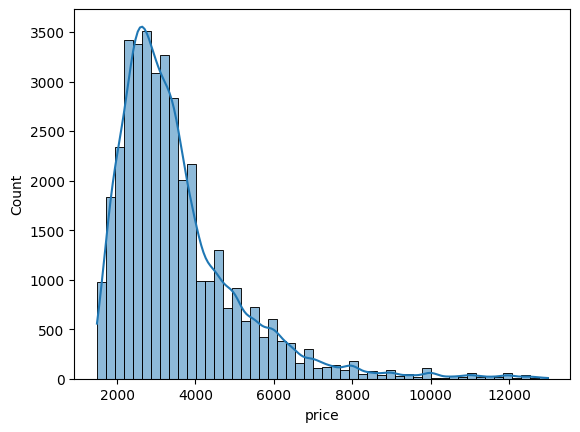

In [44]:
sns.histplot(y_train, bins=50, kde=True)
plt.show()

In [45]:
model_orig = LinearRegression()
model_orig.fit(X_train, y_train)

y_pred_train_orig = model_orig.predict(X_train)
y_pred_test_orig = model_orig.predict(X_test)

mae_linear_train_orig = mean_absolute_error(y_train, y_pred_train_orig)
mae_linear_test_orig = mean_absolute_error(y_test, y_pred_test_orig)
rmse_linear_train_orig = np.sqrt(mean_squared_error(y_train, y_pred_train_orig))
rmse_linear_test_orig = np.sqrt(mean_squared_error(y_test, y_pred_test_orig))
r2_linear_train_orig = model_orig.score(X_train, y_train)
r2_linear_test_orig = model_orig.score(X_test, y_test)

y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

y_pred_train_log = model_log.predict(X_train)
y_pred_test_log = model_log.predict(X_test)

mae_linear_train_log = mean_absolute_error(y_train_log, y_pred_train_log)
mae_linear_test_log = mean_absolute_error(y_test_log, y_pred_test_log)
rmse_linear_train_log = np.sqrt(mean_squared_error(y_train_log, y_pred_train_log))
rmse_linear_test_log = np.sqrt(mean_squared_error(y_test_log, y_pred_test_log))
r2_linear_train_log = model_log.score(X_train, y_train_log)
r2_linear_test_log = model_log.score(X_test, y_test_log)

columns = ["model", "train", "test"]

mae_table = pd.DataFrame([
    {"model": "LinearRegression_orig", "train": mae_linear_train_orig, "test": mae_linear_test_orig},
    {"model": "LinearRegression_log", "train": mae_linear_train_log, "test": mae_linear_test_log}
], columns=columns)

rmse_table = pd.DataFrame([
    {"model": "LinearRegression_orig", "train": rmse_linear_train_orig, "test": rmse_linear_test_orig},
    {"model": "LinearRegression_log", "train": rmse_linear_train_log, "test": rmse_linear_test_log}
], columns=columns)

r2_table = pd.DataFrame([
    {"model": "LinearRegression_orig", "train": r2_linear_train_orig, "test": r2_linear_test_orig},
    {"model": "LinearRegression_log", "train": r2_linear_train_log, "test": r2_linear_test_log}
], columns=columns)


In [46]:
mae_table

,model,train,test
0,LinearRegression_orig,712.863056,717.246491
1,LinearRegression_log,0.192954,0.194761


In [47]:
rmse_table

,model,train,test
0,LinearRegression_orig,1034.660233,1050.923078
1,LinearRegression_log,0.250603,0.254540


In [48]:
r2_table

,model,train,test
0,LinearRegression_orig,0.575863,0.553666
1,LinearRegression_log,0.576057,0.555754


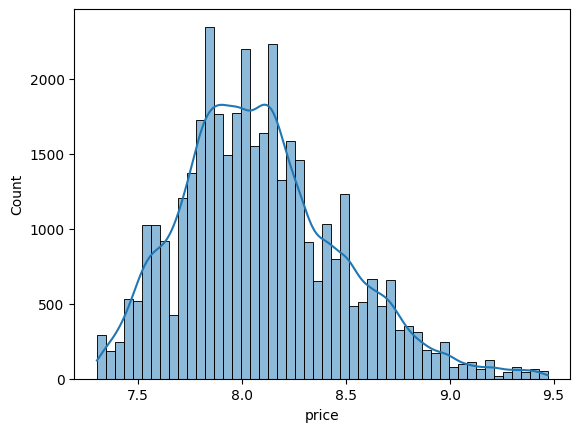

In [49]:
sns.histplot(y_train_log, bins=50, kde=True)
plt.show()

Удаление выбросов из обучающей выборки помогает модели не искажать параметры и не переобучаться на экстремальные значения, которые не отражают общее распределение данных.
Тестовая выборка должна представлять реальные данные, проверяя насколько хорошо модель предсказывает реальные, иногда аномальные ситуации.

In [50]:
X2 = train_df[feature_list]
y2 = train_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

low_perc = y_train.quantile(0.01)
high_perc = y_train.quantile(0.99)
mask = (y_train > low_perc) & (y_train < high_perc)

X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_clean)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train_clean)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

mae_train = mean_absolute_error(y_train_clean, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train_clean, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = model.score(X_train_scaled, y_train_clean)
r2_test = model.score(X_test_scaled, y_test)

print(f"MAE train: {mae_train:.4f}, MAE test: {mae_test:.4f}")
print(f"RMSE train: {rmse_train:.4f}, RMSE test: {rmse_test:.4f}")
print(f"R2 train: {r2_train:.4f}, R2 test: {r2_test:.4f}")


MAE train: 665.8436, MAE test: 713.7222
RMSE train: 921.4871, RMSE test: 1055.8341
R2 train: 0.5570, R2 test: 0.5495


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [52]:
class linear_regression():
  def __init__(self):
    self.lr_speed = 0.00001
    self.lr_epochs = 400
    self.weights = None

  def fit(self, X, y, batch_size=16):
    X = np.array(X)
    y = np.array(y)

    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features + 1)
    np.random.seed(21)

    for _ in range(self.lr_epochs):
      indices = np.random.permutation(n_samples)
      X_shuffled = X[indices]
      y_shuffled = y[indices]

      for start in range(0, n_samples, batch_size):
          end = start + batch_size
          xi = X_shuffled[start:end]
          yi = y_shuffled[start:end]

          y_pred = np.dot(xi, self.weights[1:]) + self.weights[0]
          error = yi - y_pred

          self.weights[1:] += self.lr_speed * np.dot(error, xi)
          self.weights[0] += self.lr_speed * error.sum()


  def predict(self, X):
    X = np.array(X)
    return np.dot(X, self.weights[1:]) + self.weights[0]

  def r_squared (self, y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    u = ((y - y_pred) ** 2).sum()
    v = ((y - y.mean()) ** 2).sum()
    return 1 - (u / v)

In [53]:
lr_my = linear_regression()
lr_my.fit(X_train, y_train)

y_pred_my_train = lr_my.predict(X_train)
y_pred_my_test = lr_my.predict(X_test)

mae_my_train = mean_absolute_error(y_train, y_pred_my_train)
mae_my_test = mean_absolute_error(y_test, y_pred_my_test)

rmse_my_train = np.sqrt(mean_squared_error(y_train, y_pred_my_train))
rmse_my_test = np.sqrt(mean_squared_error(y_test, y_pred_my_test))

r2_my_train = lr_my.r_squared(y_train, y_pred_my_train)
r2_my_test = lr_my.r_squared(y_test, y_pred_my_test)

In [54]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

y_pred_linear_train = model_linear.predict(X_train)
y_pred_linear_test = model_linear.predict(X_test)

mae_linear_train = mean_absolute_error(y_train, y_pred_linear_train)
mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)
rmse_linear_train = np.sqrt(mean_squared_error(y_train, y_pred_linear_train))
rmse_linear_test = np.sqrt(mean_squared_error(y_test, y_pred_linear_test))
r2_linear_train = model_linear.score(X_train, y_train)
r2_linear_test = model_linear.score(X_test, y_test)

In [55]:
columns = ["model", "train", "test"]

mae_table = pd.DataFrame([
    {"model": "lr_my", "train": mae_my_train, "test": mae_my_test},
    {"model": "LinearRegression", "train": mae_linear_train, "test": mae_linear_test}
], columns=columns)

rmse_table = pd.DataFrame([
    {"model": "lr_my", "train": rmse_my_train, "test": rmse_my_test},
    {"model": "LinearRegression", "train": rmse_linear_train, "test": rmse_linear_test}
], columns=columns)

r2_table = pd.DataFrame([
    {"model": "lr_my", "train": r2_my_train, "test": r2_my_test},
    {"model": "LinearRegression", "train": r2_linear_train, "test": r2_linear_test}
], columns=columns)

In [56]:
mae_table

,model,train,test
0,lr_my,713.006539,717.626774
1,LinearRegression,712.863056,717.246491


In [57]:
rmse_table

,model,train,test
0,lr_my,1034.825354,1051.305668
1,LinearRegression,1034.660233,1050.923078


In [58]:
r2_table

,model,train,test
0,lr_my,0.575727,0.553341
1,LinearRegression,0.575863,0.553666
